In [1]:
from main import *
from bovw import *
from plotting import *

In [2]:
import os
import random
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [4]:
data_train = Dataset(ImageFolder="../data/places_reduced/train")
data_test = Dataset(ImageFolder="../data/places_reduced/val")

len(data_train), len(data_test)

(8700, 2200)

In [ ]:
random.shuffle(data_train)
random.shuffle(data_test)

enable_cache()

In [ ]:
classifier_results = {}

# Pyramid levels explanation:
# level=1 -> 1x1 grid (1 region) = Classic BoVW (no spatial pyramid)
# level=2 -> 2x2 grid (4 regions) = 2-level spatial pyramid
# level=3 -> 3x3 grid (9 regions) = 3-level spatial pyramid
# etc.

levels = range(1, 6)

for level in levels:
    bovw_params = {
        "detector_type": "SIFT",
        "codebook_size": 512,
        "pyramid_levels": level,
        "detector_kwargs": {"nfeatures": 1000},
    }
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "max_iter": 1000,
        "class_weight": "balanced",
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
            bovw_kwargs=bovw_params,
            classifier_cls=classifier_cls,
            classifier_kwargs=classifier_params,
            n_splits=5
    )
        
    classifier_results[level] = scores


print("\nSUMMARY")
for lv in classifier_results.keys():
    print(f"Level={lv} -> Accuracy Train: {classifier_results[lv].train.accuracy.mean:.4f} ± {classifier_results[lv].train.accuracy.std:.4f}")
    print(f"Level={lv} -> Accuracy Val: {classifier_results[lv].val.accuracy.mean:.4f} ± {classifier_results[lv].val.accuracy.std:.4f}")
    print()

Phase [Setup]: Extracting the descriptors:   5%|▌         | 476/8700 [00:06<02:11, 62.35it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▊    | 5093/8700 [01:25<00:57, 62.92it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 509/8700 [00:01<00:26, 306.27it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5122/8700 [00:15<00:10, 351.36it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 516/8700 [00:01<00:22, 356.02it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5159/8700 [00:11<00:06, 589.13it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 526/8700 [00:01<00:24, 338.92it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5140/8700 [00:11<00:06, 563.20it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 497/8700 [00:02<00:32, 256.16it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5138/8700 [00:17<00:08, 409.23it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


100%|██████████| 5/5 [11:13<00:00, 134.73s/it]




SUMMARY
Level=1 -> Accuracy Train: 0.4514 ± 0.0035
Level=1 -> Accuracy Test: 0.3271 ± 0.0140

Level=2 -> Accuracy Train: 0.7840 ± 0.0049
Level=2 -> Accuracy Test: 0.3109 ± 0.0108

Level=3 -> Accuracy Train: 0.9977 ± 0.0008
Level=3 -> Accuracy Test: 0.3079 ± 0.0071

Level=4 -> Accuracy Train: 1.0000 ± 0.0001
Level=4 -> Accuracy Test: 0.3109 ± 0.0118

Level=5 -> Accuracy Train: 1.0000 ± 0.0000
Level=5 -> Accuracy Test: 0.3162 ± 0.0097



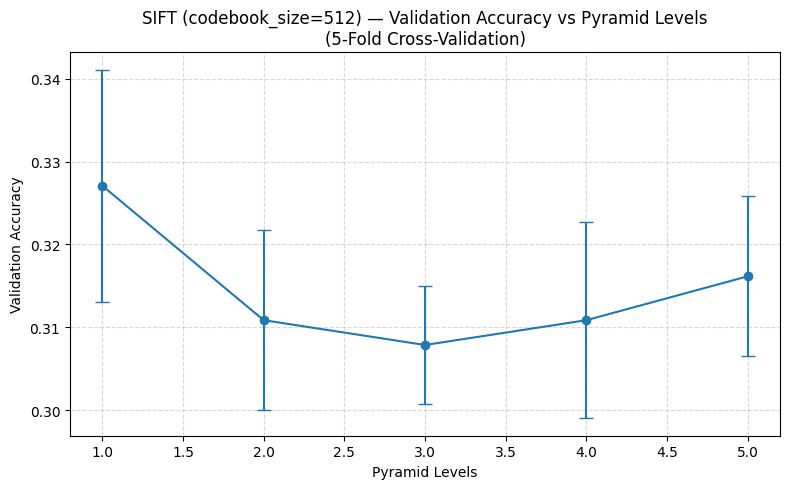

In [ ]:
# Plot the validation accuracy vs pyramid levels
x_values = list(classifier_results.keys())
means = [classifier_results[lv].val.accuracy.mean for lv in x_values]
stds = [classifier_results[lv].val.accuracy.std for lv in x_values]

plot_cv_accuracy(
    x_values=x_values,
    means=means,
    stds=stds,
    descriptor_name="SIFT (codebook_size=512)",
    hyperparam_name="Pyramid Levels"
)